In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import random

In [2]:
# Importing birth rate data
birthData = pd.read_csv("Datasets/Birth_Rate_clean.csv")
birthData.tail()

,Data Series,2022 Dec,2022 Nov,2022 Oct,2022 Sep,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,...,1960 Oct,1960 Sep,1960 Aug,1960 Jul,1960 Jun,1960 May,1960 Apr,1960 Mar,1960 Feb,1960 Jan
10,Total Female Live-Births By Ethnic Group,1422,1452,1506,1539,1458,1426,1379,1420,1306,...,2754,2478,2583,2547,2451,2586,2388,2396,2166,2360
11,Malays,308,323,333,363,319,287,330,320,331,...,474,441,472,426,413,432,393,418,402,394
12,Chinese,825,797,856,869,799,831,748,831,705,...,2013,1754,1856,1848,1794,1910,1776,1756,1523,1701
13,Indians,158,182,161,163,150,173,155,142,154,...,218,243,200,218,210,196,179,178,192,227
14,Other Ethnic Groups,131,150,156,144,190,135,146,127,116,...,49,40,55,55,34,48,40,44,49,38


In [3]:
# Data cleaning
# Update index name
birthData = birthData.rename(columns = {'Data Series':'Date'})
birthData.set_index('Date',inplace=True)
birthData = birthData.rename(columns=lambda x: x.strip())
birthData.columns = pd.DatetimeIndex(birthData.columns).to_period('M')
# birthData.head()

# Switch rows and columns (Tranpose)
birthData = birthData.T
birthData = birthData.rename(columns=lambda x: x.strip())
birthData = birthData.sort_index()
birthData.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 756 entries, 1960-01 to 2022-12
Freq: M
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Total Live-Births By Ethnic Group         756 non-null    int64
 1   Malays                                    756 non-null    int64
 2   Chinese                                   756 non-null    int64
 3   Indians                                   756 non-null    int64
 4   Other Ethnic Groups                       756 non-null    int64
 5   Total Male Live-Births By Ethnic Group    756 non-null    int64
 6   Malays                                    756 non-null    int64
 7   Chinese                                   756 non-null    int64
 8   Indians                                   756 non-null    int64
 9   Other Ethnic Groups                       756 non-null    int64
 10  Total Female Live-Births By Ethnic Group  7

<AxesSubplot:>

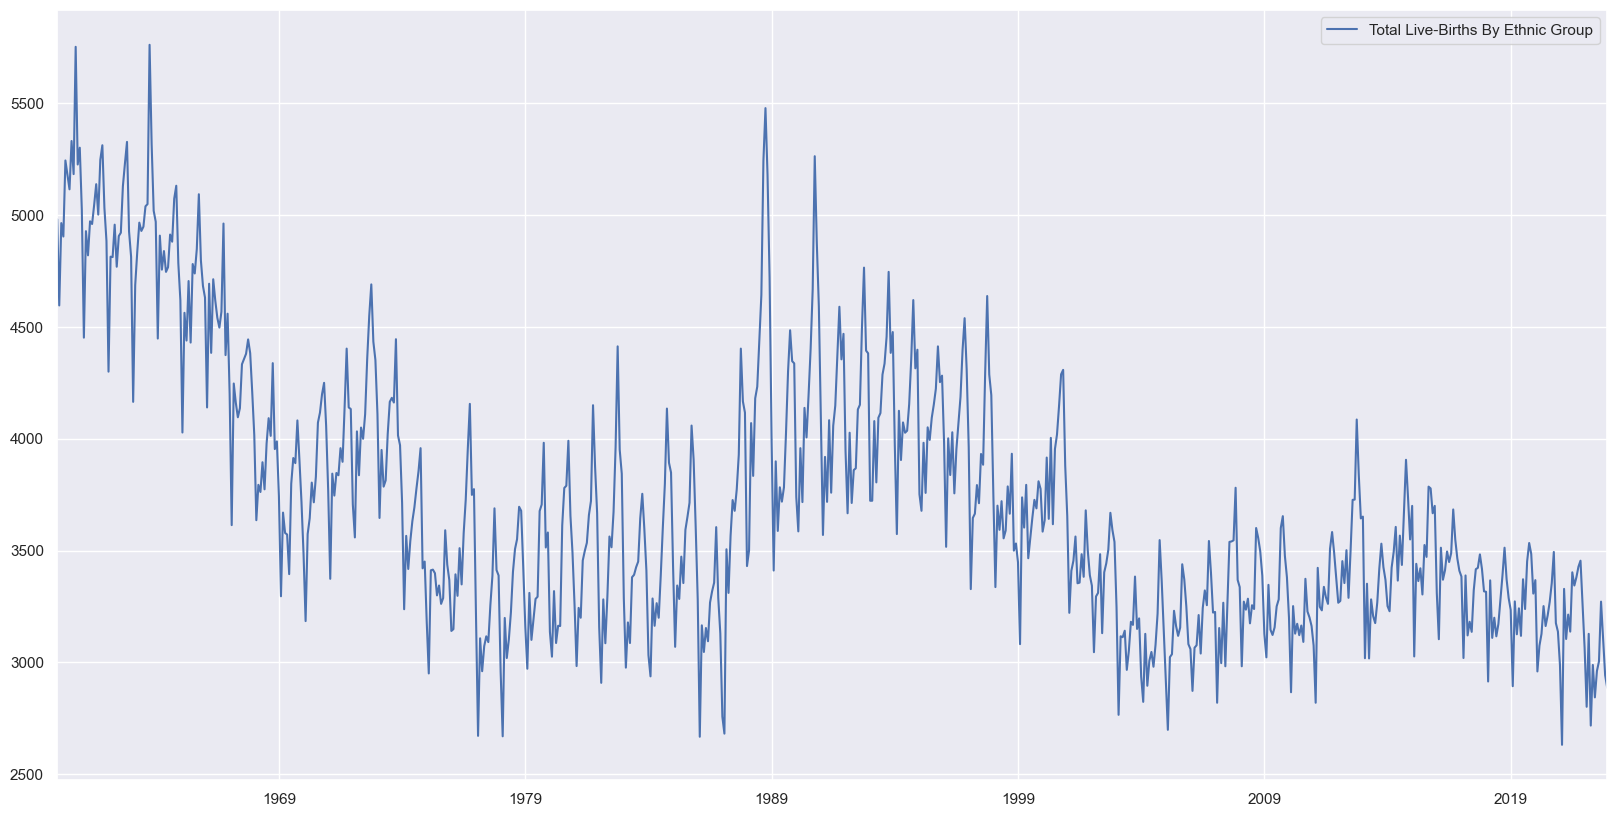

In [4]:
babies = pd.DataFrame(birthData['Total Live-Births By Ethnic Group'])

babies.head()
babies = babies.astype('int64')
babies.plot(figsize=(20, 10))

## Variable: Education Cost

- Standardized the date to `YYYY-MM` following the date format for the birth count dataset

In [5]:
# Variable: Education Costs
edu = pd.read_csv("Datasets/Education_clean.csv")
edu = edu.rename(columns = {'Data Series':'Date','Education':'Total'})
birthData = birthData.rename(columns=lambda x: x.strip())
edu['Date'] = pd.to_datetime(edu['Date'])
edu['Date'] = edu['Date'].dt.strftime('%Y-%m')

edu = edu.set_index('Date')
edu.index = pd.to_datetime(edu.index).to_period('M')
edu = edu.fillna(0)
edu.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 745 entries, 2023-01 to 1961-01
Freq: M
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Total                           745 non-null    float64
 1   Tuition & Other Fees            745 non-null    float64
 2   Textbooks & Guides              745 non-null    float64
 3   Miscellaneous Goods & Services  745 non-null    float64
dtypes: float64(4)
memory usage: 29.1 KB


<AxesSubplot:>

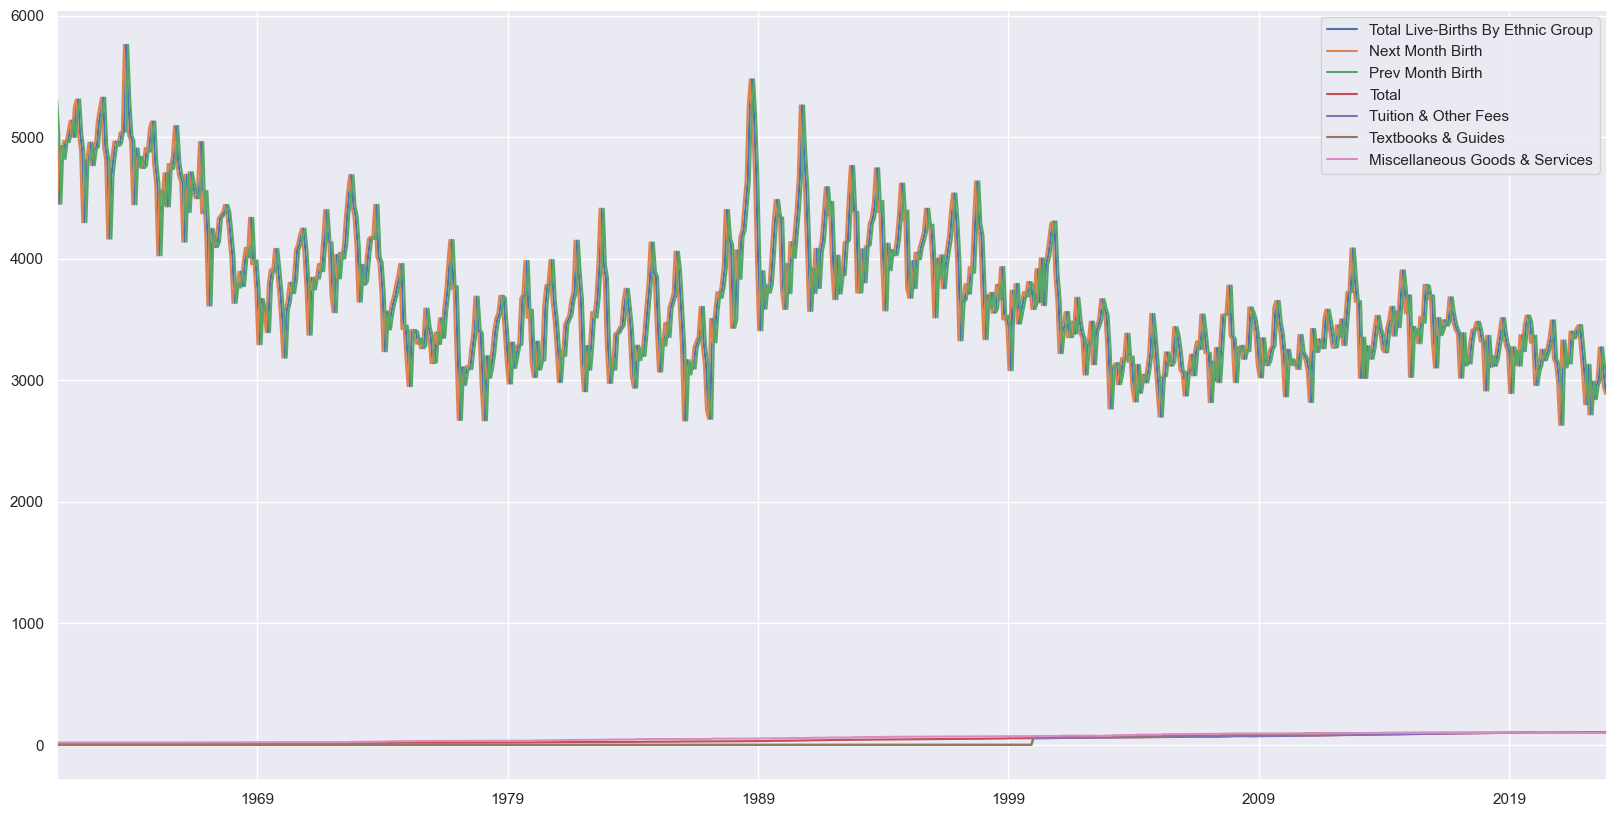

In [6]:
eduBaby = pd.DataFrame(birthData['Total Live-Births By Ethnic Group'])
eduBaby['Next Month Birth'] = eduBaby['Total Live-Births By Ethnic Group'].shift(-1)
eduBaby['Prev Month Birth'] = eduBaby['Total Live-Births By Ethnic Group'].shift(1)
eduTotal = eduBaby.join(edu['Total'], how='inner')
eduTuition = eduBaby.join(edu['Tuition & Other Fees'], how='inner')
eduText = eduBaby.join(edu['Textbooks & Guides'], how='inner')
eduMisc = eduBaby.join(edu['Miscellaneous Goods & Services'], how='inner')
eduMerge = pd.concat([eduTotal, eduTuition, eduText, eduMisc], axis=1, join='inner')
eduMerge = eduMerge.loc[:,~eduMerge.columns.duplicated(keep='first')]
eduMerge.plot(figsize=(20, 10))

In [7]:
eduMerge.info()
eduMerge.corr()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 744 entries, 1961-01 to 2022-12
Freq: M
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total Live-Births By Ethnic Group  744 non-null    int64  
 1   Next Month Birth                   743 non-null    float64
 2   Prev Month Birth                   744 non-null    float64
 3   Total                              744 non-null    float64
 4   Tuition & Other Fees               744 non-null    float64
 5   Textbooks & Guides                 744 non-null    float64
 6   Miscellaneous Goods & Services     744 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 62.7 KB


,Total Live-Births By Ethnic Group,Next Month Birth,Prev Month Birth,Total,Tuition & Other Fees,Textbooks & Guides,Miscellaneous Goods & Services
Total Live-Births By Ethnic Group,1.000000,0.900852,0.901578,-0.494433,-0.515877,-0.519950,-0.538014
Next Month Birth,0.900852,1.000000,0.841425,-0.493073,-0.515137,-0.519299,-0.535644
Prev Month Birth,0.901578,0.841425,1.000000,-0.493594,-0.513902,-0.518162,-0.539989
Total,-0.494433,-0.493073,-0.493594,1.000000,0.937293,0.923201,0.965209
Tuition & Other Fees,-0.515877,-0.515137,-0.513902,0.937293,1.000000,0.994519,0.868481
Textbooks & Guides,-0.519950,-0.519299,-0.518162,0.923201,0.994519,1.000000,0.871957
Miscellaneous Goods & Services,-0.538014,-0.535644,-0.539989,0.965209,0.868481,0.871957,1.000000


## Analysis
- `Total` of Education components does not have a good enough correlation with Total Live-Births By Ethnic Group, thus removed

In [8]:
eduUpdate = pd.concat([eduTuition, eduText, eduMisc], axis=1, join='inner')
eduUpdate = eduUpdate.loc[:,~eduUpdate.columns.duplicated(keep='first')]
eduUpdate.info()
eduUpdate.corr()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 744 entries, 1961-01 to 2022-12
Freq: M
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total Live-Births By Ethnic Group  744 non-null    int64  
 1   Next Month Birth                   743 non-null    float64
 2   Prev Month Birth                   744 non-null    float64
 3   Tuition & Other Fees               744 non-null    float64
 4   Textbooks & Guides                 744 non-null    float64
 5   Miscellaneous Goods & Services     744 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 56.9 KB


,Total Live-Births By Ethnic Group,Next Month Birth,Prev Month Birth,Tuition & Other Fees,Textbooks & Guides,Miscellaneous Goods & Services
Total Live-Births By Ethnic Group,1.000000,0.900852,0.901578,-0.515877,-0.519950,-0.538014
Next Month Birth,0.900852,1.000000,0.841425,-0.515137,-0.519299,-0.535644
Prev Month Birth,0.901578,0.841425,1.000000,-0.513902,-0.518162,-0.539989
Tuition & Other Fees,-0.515877,-0.515137,-0.513902,1.000000,0.994519,0.868481
Textbooks & Guides,-0.519950,-0.519299,-0.518162,0.994519,1.000000,0.871957
Miscellaneous Goods & Services,-0.538014,-0.535644,-0.539989,0.868481,0.871957,1.000000


## Classification: Random Forest
- Goal: From the available variables this month, predict the rise/fall of the next month's birth rate
- Available Data:
    - Current/Prev Month Birth Count
    - Tuition/Textbooks/Misc

## Classification Model Performance Metrics
- Accuracy:  Number of correct predictions
- Precision: Proportion of true positives out of all positive predictions
- Recall:    Proportion of true positives out of all actual positive cases
- F1 Score:  Harmonic mean of precision and recall

In [10]:
results = []

for i in range(250):
    seed = random.randint(0, 10000)
    # Step 1: Create binary target variable
    eduUpdate['Rise-Fall'] = (eduUpdate['Total Live-Births By Ethnic Group'] > eduUpdate['Next Month Birth']).astype(int)

    # Step 2: Combine features into single dataframe
    # Step 2.1: Predictors
    X = eduUpdate[['Total Live-Births By Ethnic Group', 'Prev Month Birth', 'Tuition & Other Fees', 'Textbooks & Guides','Miscellaneous Goods & Services']]

    # Step 2.2: Response
    y = eduUpdate['Rise-Fall']

    # Step 3: Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Step 4: Create Random Forest Classifier object
    rf = RandomForestClassifier(n_estimators=100, max_depth=5)

    # Step 5: Fit model to training data
    rf.fit(X_train, y_train)

    # Step 6: Make predictions on test data
    y_pred = rf.predict(X_test)

    # Step 7: Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confuse = confusion_matrix(y_test, y_pred)

    results.append((seed, accuracy, precision, recall, f1, confuse))


# Sort results by F1 score in descending order
results.sort(key=lambda x: x[4], reverse=True)

In [11]:
results = results[:5]

for i in range(5):
    print('----------------------------------------------')
    print(f"Random state {results[i][0]}:")
    print(f'Accuracy  = {results[i][1]:.4f}')
    print(f'Precision = {results[i][2]:.4f}')
    print(f'Recall    = {results[i][3]:.4f}')
    print(f'F1 score  = {results[i][4]:.4f}')

print('----------------------------------------------')

----------------------------------------------
Random state 3666:
Accuracy  = 0.7517
Precision = 0.6818
Recall    = 0.7377
F1 score  = 0.7087
----------------------------------------------
Random state 923:
Accuracy  = 0.7181
Precision = 0.7391
Recall    = 0.6800
F1 score  = 0.7083
----------------------------------------------
Random state 9369:
Accuracy  = 0.6980
Precision = 0.7361
Recall    = 0.6709
F1 score  = 0.7020
----------------------------------------------
Random state 5703:
Accuracy  = 0.7114
Precision = 0.6849
Recall    = 0.7143
F1 score  = 0.6993
----------------------------------------------
Random state 7209:
Accuracy  = 0.6779
Precision = 0.6974
Recall    = 0.6795
F1 score  = 0.6883
----------------------------------------------


In [12]:
print(f'Average Accuracy:  {sum([i[1] for i in results])/5:.4f}')
print(f'Average Precision: {sum([i[2] for i in results])/5:.4f}')
print(f'Average Recall:    {sum([i[3] for i in results])/5:.4f}')
print(f'Average F1 Score:  {sum([i[4] for i in results])/5:.4f}')

Average Accuracy:  0.7114
Average Precision: 0.7079
Average Recall:    0.6965
Average F1 Score:  0.7013


## Final Verdict for Education Costs
The average metrics from the top 5 random seeds are around 0.7 and even 0.69

Not a very good model to be used for education costs to predict birth rate
It is worth noting that education costs do not add up much compared to other factors for household expenses, thus can possibly be a factor to omit in predictions